# Analysis of the United Nation's Food and Agriculture <br>Organization's Crop Production Data
The United Nation's Food and Agriculture Organization (FAO) publishes statistics of crop production from around the world. This project analyzes crop production data as reported by the FAO between 2000-2007. This analysis evaluates the n crops (default n = 4) with the highest average yield (in Hg/Ha) across all countries and all years in the dataset. For these n crops, this analysis determines the three highest producing countries. 

In [26]:
import pandas as pd
import numpy as np
import os

Import FAO Crop Data Excel file and read file into a dataframe.

In [27]:
pwd = os.getcwd()
file_path = pwd + "/fao_crops_data.xlsx"
df = pd.read_excel(file_path)

In [28]:
df.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007,Ha,49404,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006,Ha,49404,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005,Ha,49404,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004,Ha,49113,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003,Ha,48559,A,agave_fibres_nes


The country_or_area column includes both countries and areas. Areas are identified with a plus sign (+) following the area name, so we'll create a column to distinguish between countries and regions based on whether the region name ends with a plus sign.

In [29]:
def define_area(row):
    if row['country_or_area'].split()[-1] == '+':
        row['geo_area'] = 'Region'
    else :
        row['geo_area'] = 'Country'
    return row

df = df.apply(define_area, axis='columns')

In [30]:
df.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category,geo_area
0,Americas +,31,Area Harvested,2007,Ha,49404,A,agave_fibres_nes,Region
1,Americas +,31,Area Harvested,2006,Ha,49404,A,agave_fibres_nes,Region
2,Americas +,31,Area Harvested,2005,Ha,49404,A,agave_fibres_nes,Region
3,Americas +,31,Area Harvested,2004,Ha,49113,A,agave_fibres_nes,Region
4,Americas +,31,Area Harvested,2003,Ha,48559,A,agave_fibres_nes,Region


Define a dataframe created to analyze yield data by country.

In [31]:
df_country = df[(df['geo_area']=="Country") & (df['element']=='Yield')]

Calculate the mean yield across all years and countries to choose the n highest yield crops, as measured in Hg/Ha.

In [32]:
n = 4
crop_avgs = df_country.groupby('category').agg({'value':np.nanmean})
sorted_crop_avgs = crop_avgs.sort_values(by=['value'],ascending=False)
high_yield_crops = list(sorted_crop_avgs[:n].index)
print("The " + str(n) + " highest yield crops in Hg/Ha are:")
print(*high_yield_crops, sep=', ')

The 4 highest yield crops in Hg/Ha are:
cucumbers_and_gherkins, eggplants_aubergines, cabbages_and_other_brassicas, carrots_and_turnips


Sorting the data to determine the 3 highest yield countries in for each of the n highest yield crops.

In [33]:
df_country_crops = df_country[df_country['category'].isin(high_yield_crops)]
df_country_crops = df_country_crops.groupby(['category', 'country_or_area']).agg({'value':np.nanmean})
df_country_crops.sort_values(by=['category','value'], ascending=False, inplace=True)
df_country_crops = df_country_crops.groupby('category').head(3)
df_country_crops = df_country_crops.reindex(high_yield_crops, level='category')

In [34]:
df_country_crops

value
category                     country_or_area                          
cucumbers_and_gherkins       Netherlands                   6802091.000
                             United Kingdom                4779496.625
                             Iceland                       2567099.750
eggplants_aubergines         Netherlands                   4350115.875
                             Belgium                       1347916.625
                             Israel                         687634.500
cabbages_and_other_brassicas Tanzania, United Republic of  1372108.875
                             Korea, Republic of             607492.625
                             South Africa                   586442.500
carrots_and_turnips          United Kingdom                 655389.250
                             Israel                         622961.500
                             Belgium                        593018.375

Preparing to plot the data.

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting data.

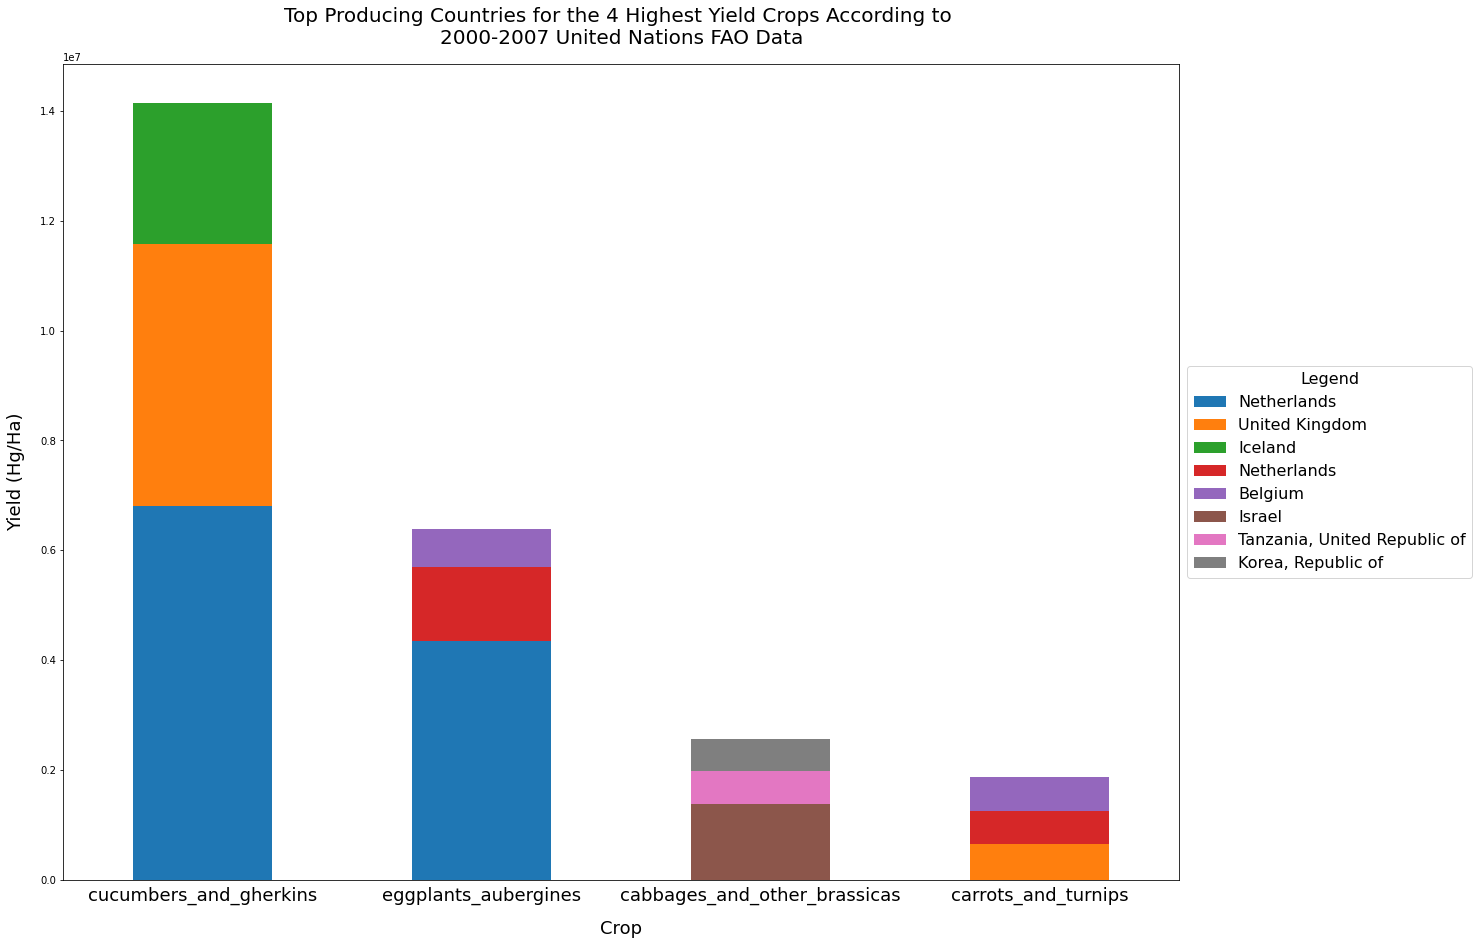

In [42]:
%matplotlib inline
df_country_crops.unstack(level=1).plot(kind='bar', stacked=True, figsize=(20,15))

plt.tick_params(bottom=False)

ax = plt.gca()
ax.set_xlabel('Crop', labelpad=15, fontsize=18)
ax.set_ylabel('Yield (Hg/Ha)', labelpad=15, fontsize=18)
title = 'Top Producing Countries for the ' + str(n) + ' Highest Yield Crops According to \n2000-2007 United Nations FAO Data'
ax.set_title(title, pad=20, fontsize=20)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(0)
plt.xticks(fontsize= 18)

plt.legend(loc='center left', title = 'Legend', bbox_to_anchor=(1, 0.5), labels = list(df_country_crops.index.droplevel(0)), title_fontsize= 16,fontsize=16)
plt.show()

This plot displays the yield in Hg/Ha of the four highest yield crops: 

1. Cucumbers and gherkins
2. Eggplants/aubergines
3. Cabbages and other brassicas
4. Carrots and turnips

The stacked bar chart indicates the three highest producing countries per crop. This visualization clearly shows the Netherlands produces a large portion of the two highest yield crops.